In [37]:
import numpy as np
import matplotlib.pyplot as plt

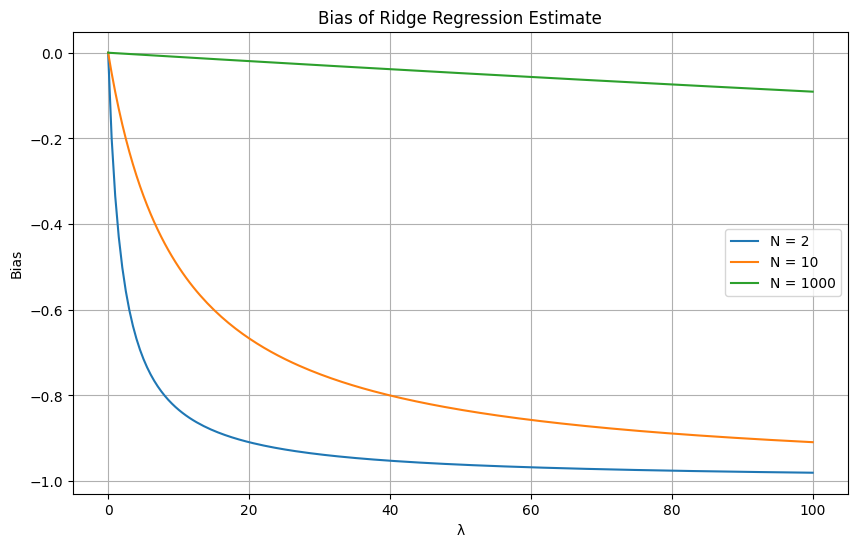

In [44]:

# ------------------------------ #3 part A------------------------------------------------
# **** Got assistance from ChatGPT for generating the plots ****
theta_initial = 1
noise_std_dev = 3
lambda_range = np.linspace(0, 100, 200)
# Function to compute bias for varying values of size N
def compute_bias(N, lambda_param):
    return -(lambda_param * theta_initial) / (N + lambda_param)
# Calculating the bias for different size N
sample_sizes = [2, 10, 1000]
bias_results = {N: [compute_bias(N, lam) for lam in lambda_range] for N in sample_sizes}

plt.figure(figsize=(10, 6))
for N in sample_sizes:
    plt.plot(lambda_range, bias_results[N], label=f'N = {N}')
plt.title('Bias of Ridge Regression Estimate')
plt.xlabel('λ')
plt.ylabel('Bias')
plt.legend()
plt.grid(True)
plt.show()
# ----------------------------------------------------------------------------------------


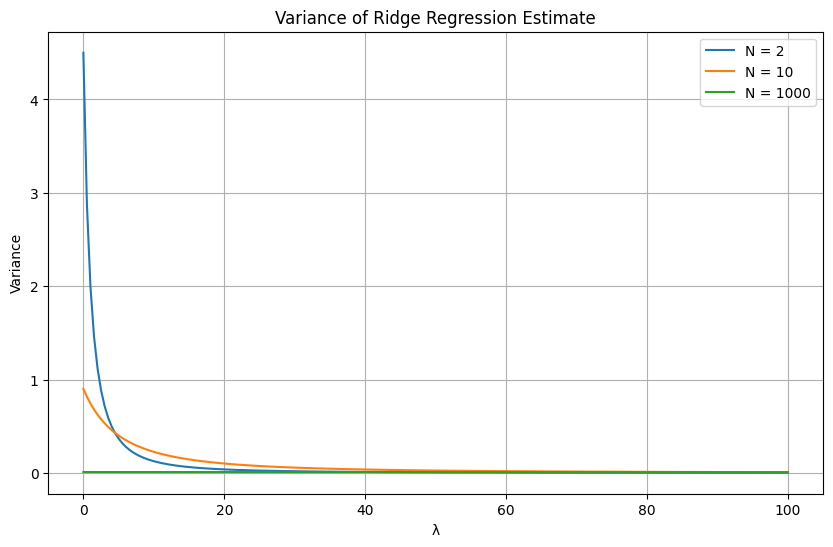

In [45]:

# ------------------------------ #3 part B------------------------------------------------
# **** Got assistance from ChatGPT for generating the plots ****
sigma_squared = noise_std_dev ** 2

# Get variance for different values of N
def calculate_variance(N, lambda_value):
    return sigma_squared * N / ((N + lambda_value) ** 2)

# Calculating variance for different N values
variance_values = {N: [calculate_variance(N, l) for l in lambda_range] for N in sample_sizes}

plt.figure(figsize=(10, 6))
for N in sample_sizes:
    plt.plot(lambda_range, variance_values[N], label=f'N = {N}')
plt.title('Variance of Ridge Regression Estimate')
plt.xlabel('λ')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)
plt.show()
# ----------------------------------------------------------------------------------------


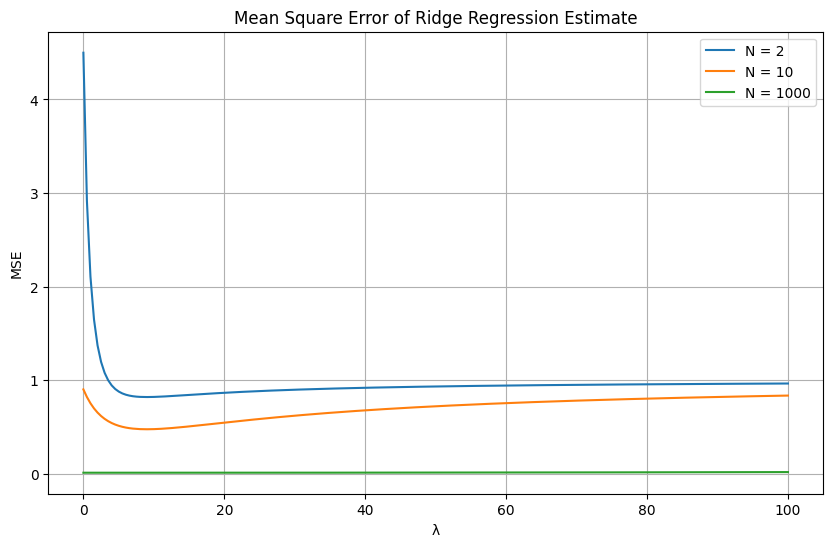

In [46]:
# ------------------------------ #3 part C------------------------------------------------
# **** Got assistance from ChatGPT for generating the plots ****

# Calculate MSE for different values of N
def calculate_mse(N, lambda_value, theta_0, sigma_squared):
    return (sigma_squared * N + lambda_value**2 * theta_0**2) / ((N + lambda_value) ** 2)
# Calculating MSE for different N values
mse_values = {N: [calculate_mse(N, l, theta_initial, sigma_squared) for l in lambda_range] for N in sample_sizes}

plt.figure(figsize=(10, 6))
for N in sample_sizes:
    plt.plot(lambda_range, mse_values[N], label=f'N = {N}')
plt.title('Mean Square Error of Ridge Regression Estimate')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()
# ----------------------------------------------------------------------------------------

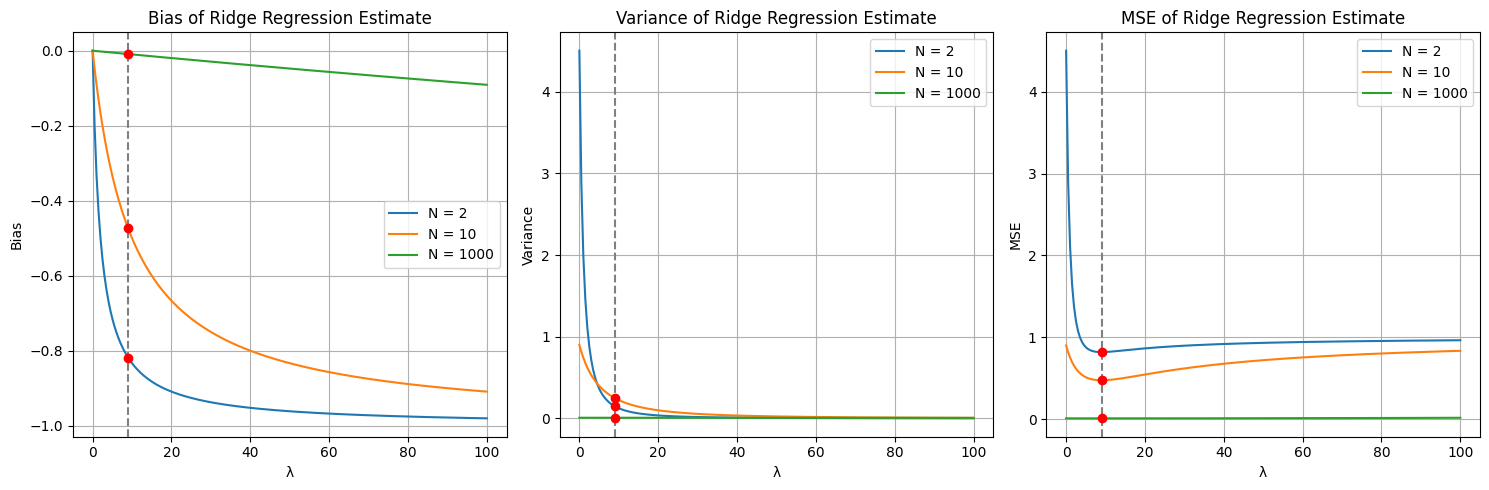

In [47]:
# ------------------------------ #3 part E------------------------------------------------
# **** Got assistance from ChatGPT for generating the plots ****

optimal_lambda = sigma_squared / theta_initial**2
# Calculate Bias, Variance, and MSE for optimal lambda
optimal_bias = {N: compute_bias(N, optimal_lambda) for N in sample_sizes}
optimal_variance = {N: calculate_variance(N, optimal_lambda) for N in sample_sizes}
optimal_mse = {N: calculate_mse(N, optimal_lambda, theta_initial, sigma_squared) for N in sample_sizes}
# Plotting Bias, Variance, and MSE
plt.figure(figsize=(15, 5))

# Bias Plot
plt.subplot(1, 3, 1)
for N in sample_sizes:
    plt.plot(lambda_range, bias_results[N], label=f'N = {N}')
    plt.scatter(optimal_lambda, optimal_bias[N], color='red', zorder=5)
plt.title('Bias of Ridge Regression Estimate')
plt.xlabel('λ')
plt.ylabel('Bias')
plt.axvline(x=optimal_lambda, color='grey', linestyle='--')
plt.legend()
plt.grid(True)

# Variance Plot
plt.subplot(1, 3, 2)
for N in sample_sizes:
    plt.plot(lambda_range, variance_values[N], label=f'N = {N}')
    plt.scatter(optimal_lambda, optimal_variance[N], color='red', zorder=5)
plt.title('Variance of Ridge Regression Estimate')
plt.xlabel('λ')
plt.ylabel('Variance')
plt.axvline(x=optimal_lambda, color='grey', linestyle='--')
plt.legend()
plt.grid(True)

# MSE Plot
plt.subplot(1, 3, 3)
for N in sample_sizes:
    plt.plot(lambda_range, mse_values[N], label=f'N = {N}')
    plt.scatter(optimal_lambda, optimal_mse[N], color='red', zorder=5)
plt.title('MSE of Ridge Regression Estimate')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.axvline(x=optimal_lambda, color='grey', linestyle='--')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
# ----------------------------------------------------------------------------------------

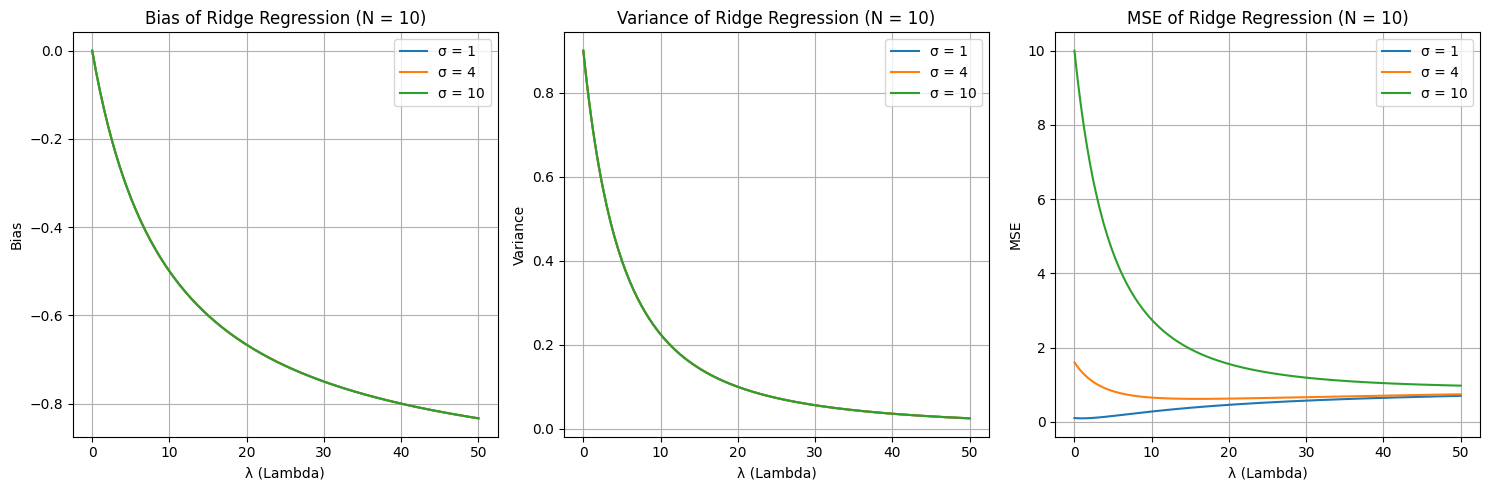

In [48]:
# ------------------------------ #3 part E------------------------------------------------
# **** Got assistance from ChatGPT for generating the plots ****

sigma_values = [1, 4, 10]
lambda_values = np.linspace(0, 50, 200)
N = 10

# Calculate bias, variance, and MSE
def calculate_values_for_sigmas(sigma_values, N, lambda_values):
    bias_values, variance_values, mse_values = {}, {}, {}

    for sigma in sigma_values:
        sigma_squared = sigma ** 2
        bias_values[sigma] = [compute_bias(N, l) for l in lambda_values]
        variance_values[sigma] = [calculate_variance(N, l) for l in lambda_values]
        mse_values[sigma] = [calculate_mse(N, l, theta_initial, sigma_squared) for l in lambda_values]

    return bias_values, variance_values, mse_values

bias_values, variance_values, mse_values = calculate_values_for_sigmas(sigma_values, N, lambda_values)

# Plotting Bias, Variance, and MSE
plt.figure(figsize=(15, 5))

# Bias Plot
plt.subplot(1, 3, 1)
for sigma in sigma_values:
    plt.plot(lambda_values, bias_values[sigma], label=f'σ = {sigma}')
plt.title('Bias of Ridge Regression (N = 10)')
plt.xlabel('λ (Lambda)')
plt.ylabel('Bias')
plt.legend()
plt.grid(True)

# Variance Plot
plt.subplot(1, 3, 2)
for sigma in sigma_values:
    plt.plot(lambda_values, variance_values[sigma], label=f'σ = {sigma}')
plt.title('Variance of Ridge Regression (N = 10)')
plt.xlabel('λ (Lambda)')
plt.ylabel('Variance')
plt.legend()
plt.grid(True)

# MSE Plot
plt.subplot(1, 3, 3)
for sigma in sigma_values:
    plt.plot(lambda_values, mse_values[sigma], label=f'σ = {sigma}')
plt.title('MSE of Ridge Regression (N = 10)')
plt.xlabel('λ (Lambda)')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
# ----------------------------------------------------------------------------------------